# Compare coastline products

- Cartopy default - Natural-earth: https://www.naturalearthdata.com/
- GSHHS: https://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html
- LINZ: https://data.linz.govt.nz/layer/105085-nz-coastline-mean-high-water/
 

In [21]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.lines as mlines



In [22]:
#load the GSHSS coastline
import cartopy.feature as cfeature
coastline_GSHSS = cfeature.GSHHSFeature(scale='full')  #scale = ‘auto’, ‘coarse’, ‘low’, ‘intermediate’, ‘high', or ‘full’

In [23]:
#https://www.linz.govt.nz/guidance/data-service/linz-data-service-guide/web-services/wfs-filtering-attribute-or-feature

import geopandas as gpd
import requests
import geojson

url = "https://data.linz.govt.nz/services;key=2649806d1e794603a07a711a152f3ba5/wfs"

params = dict(
    service="WFS",
    request="GetFeature",
    typeName="layer-105085",
    outputFormat="json",
)

r = requests.get(url, params=params)
print(r.url)

data = gpd.GeoDataFrame.from_features(geojson.loads(r.content), crs="EPSG:2193")
data.to_crs("EPSG:4326", inplace=True)
print(data.shape)
data.head()

https://data.linz.govt.nz/services;key=2649806d1e794603a07a711a152f3ba5/wfs?service=WFS&request=GetFeature&typeName=layer-105085&outputFormat=json
(17840, 7)


,geometry,id,coast_category,publish_date,source,scale,length
0,"MULTILINESTRING ((179.0614 -47.76398, 179.0611...",16876,None,2011,Topo Map Sheet BI01,25000,86
1,"MULTILINESTRING ((179.06779 -47.76246, 179.067...",16878,None,2011,Topo Map Sheet BI01,25000,38
2,"MULTILINESTRING ((-178.55677 -30.54441, -178.5...",17398,None,2011,Topo Map Sheet KI04,25000,45
3,"MULTILINESTRING ((-177.8567 -29.24599, -177.85...",17344,steep coast,2011,Topo Map Sheet KI02ptKI01,25000,110
4,"MULTILINESTRING ((179.03842 -47.76385, 179.038...",16405,None,2011,Topo Map Sheet BI01,25000,119


In [24]:
def plot_coastlines(window=[174, 176, -36, -38], clon=180, leg_loc='lower right', xlocs=None):

    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs

    fig, ax = plt.subplots(1,1, figsize=(10,8), subplot_kw={'projection': ccrs.PlateCarree(clon)})
    ax.set_extent(window)

    leg_handles = []

    ax.coastlines('10m', color='red')
    leg_handles += [mlines.Line2D([], [], color='red', label='Natural Earth')]

    ax.add_feature(coastline_GSHSS, edgecolor='k',facecolor='none', lw=2)
    leg_handles += [mlines.Line2D([], [], color='k', lw=2, label='GSHSS')]

    data.plot(ax=ax, color='g', transform=ccrs.PlateCarree())
    leg_handles += [mlines.Line2D([], [], color='g', label='LINZ coastline mean-high water')]

    ax.legend(handles=leg_handles, loc=leg_loc)
    gl = ax.gridlines(draw_labels=True, xlocs=xlocs)

    return fig,ax

#, xlocs=np.arange(160,190,5))

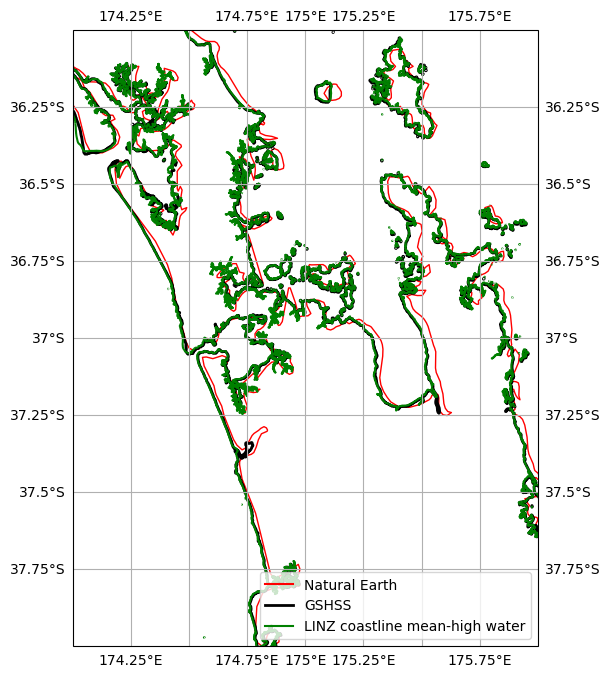

In [25]:
# Auckland
fig,ax = plot_coastlines(window=[174, 176, -36, -38], leg_loc='lower right')

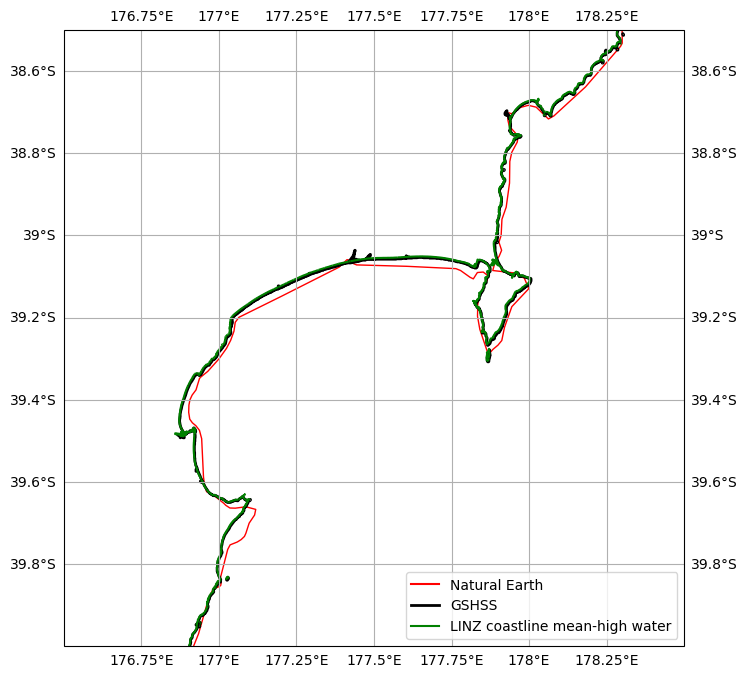

In [26]:
# Mahia
# -39.11726928022768, 177.91082075591424
fig,ax = plot_coastlines(window=[176.5, 178.5, -40, -38.5], leg_loc='lower right')

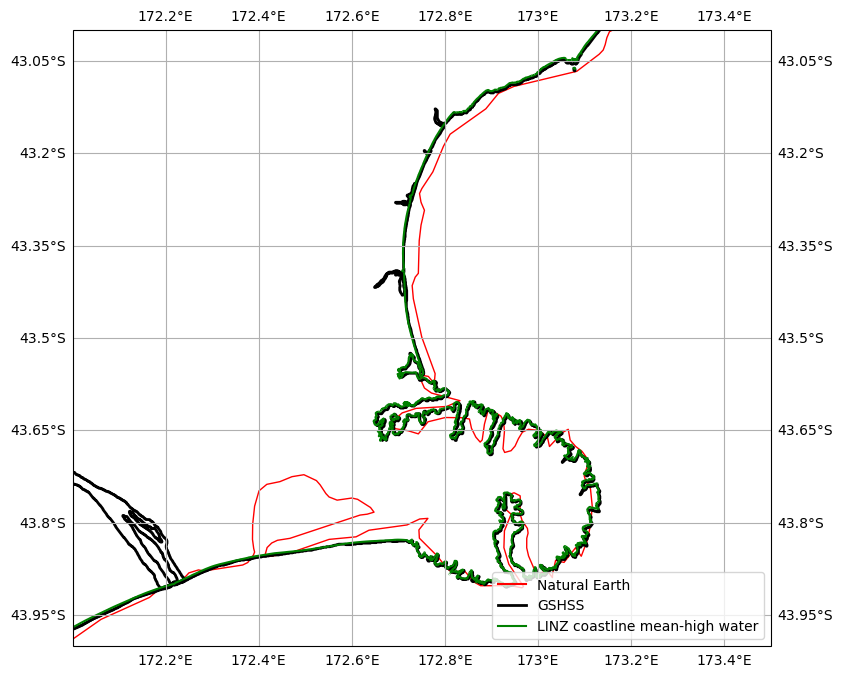

In [27]:
# Lytleton
# -43.70587714765569, 172.80434947762365
fig,ax = plot_coastlines(window=[172, 173.5, -44, -43], leg_loc='lower right')

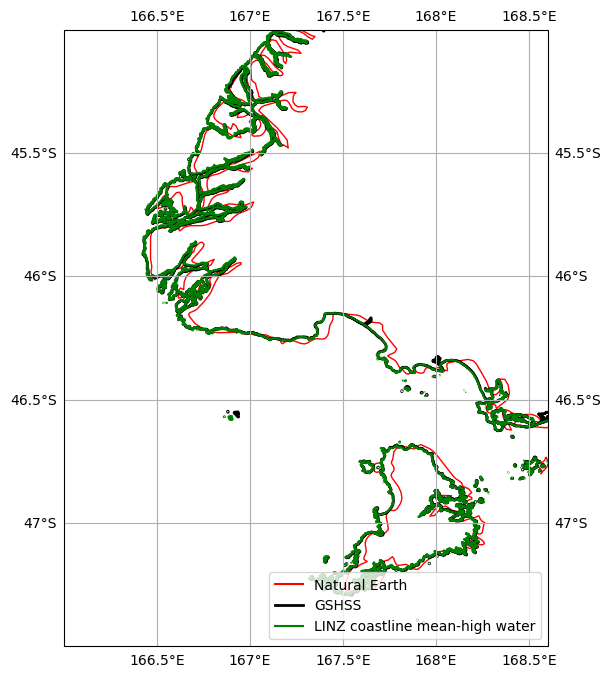

In [28]:
# Stewart Island
# -46.96370832533591, 167.9080919560567
fig,ax = plot_coastlines(window=[166, 168.6, -47.5, -45], leg_loc='lower right')
# fig.savefig('plt_coastline_sounds.png')

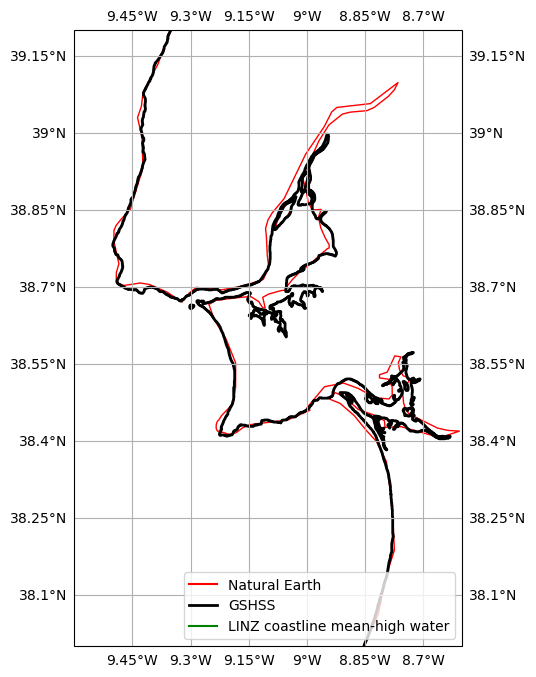

In [29]:
# Lisbon
fig,ax = plot_coastlines(window=[-9.6, -8.6, 38, 39.2], clon=0, leg_loc='lower right')

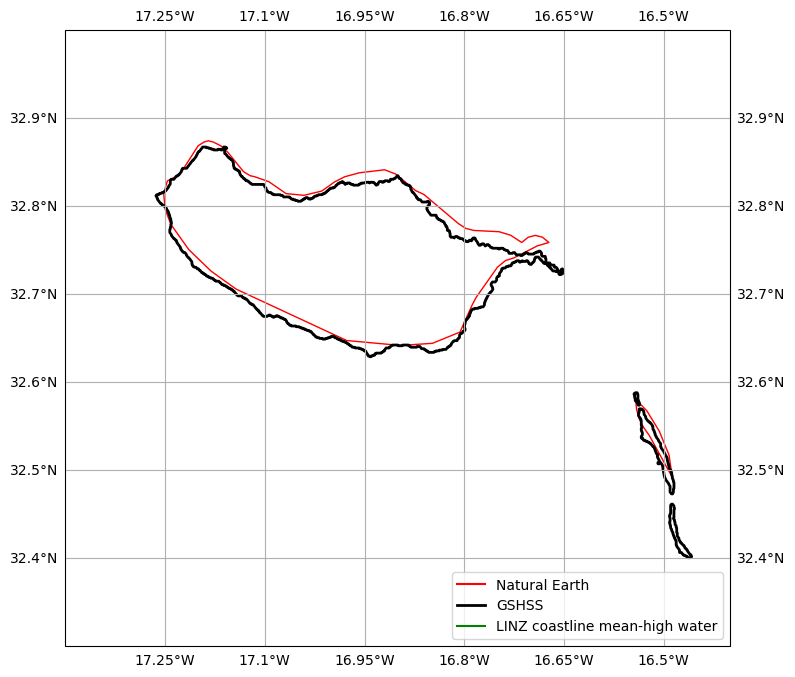

In [30]:
# Madeira
# 32.667983144110366, -16.940636395663027
fig,ax = plot_coastlines(window=[-17.4, -16.4, 32.3, 33], clon=0, leg_loc='lower right')
# fig.savefig('plt_coastline_madeira.png')

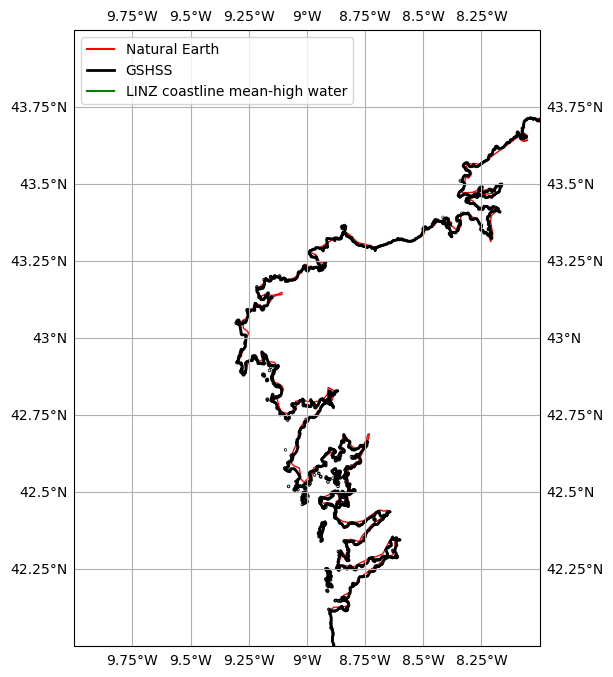

In [31]:
# Galicia
# 42.8799296625815, -8.596274659638597
fig,ax = plot_coastlines(window=[-10, -8, 42, 44], clon=0, leg_loc='upper left')

Text(5.3, 60.5, 'Bergen')

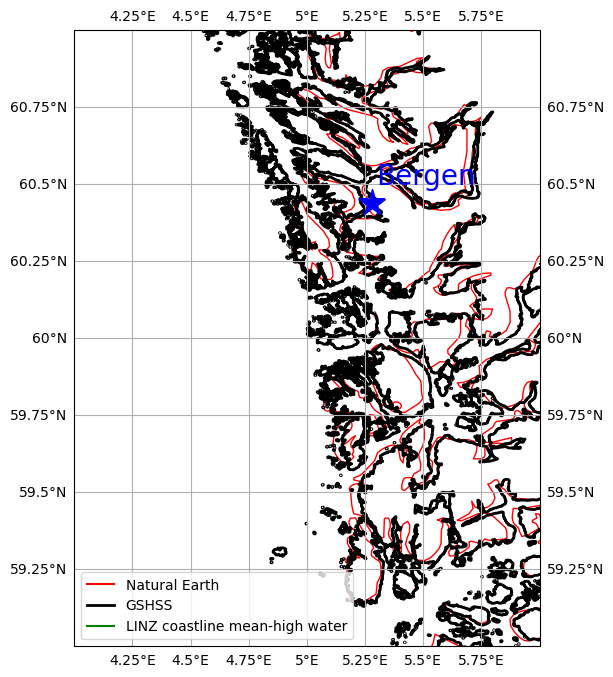

In [32]:
# Norway Bergen
# 60.43858127037093, 5.279957533657037
fig,ax = plot_coastlines(window=[4, 6, 59, 61], clon=0, leg_loc='lower left')
ax.plot(5.279957533657037,60.43858127037093, 'b*', ms=20)
ax.text(x=5.3,y=60.5, s='Bergen', color='blue', fontsize=20)
# fig.savefig('plt_coastline_norway.png')